In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Lab-2: Linear Regression.
_____
##### In this lab, you will Practice applying different Regression algorithms

### Objectives:

1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression



### Copy code from lab1, read, visualise and split dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pandas.read_csv('nice_dataset1.csv').values
print(data.shape)

mean = np.nanmean(data[:,1])
print(f"mean: {mean}")

for i in range(data.shape[1]):
    for v in range(data.shape[0]):
        if np.isnan(data[v,i]):
            print(v,i)
            data[v,i] = mean
            
x_train, x_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1] , test_size=0.2, random_state=42, shuffle=False)

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"x_train (shape = {x_train.shape})")
print(f"x_test: (shape = {x_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

(48, 2)
mean: 66.36119574468086
35 1
x_train (shape = (38, 1))
x_test: (shape = (10, 1))
y_train: (shape = (38, 1))
y_test: (shape = (10, 1))


### Apply lin regression

y_pred (shape = (38, 1))


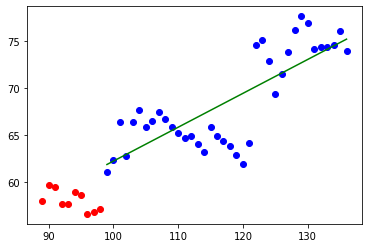

In [7]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)

print(f"y_pred (shape = {y_pred.shape})")

plt.scatter(x_test[:, 0], y_test[:, 0],  color='red')
plt.scatter(x_train[:, 0], y_train[:, 0], color='blue')
plt.plot(x_train, y_pred, color='green')

### Visualize coefs: equation y = kx + b
k = .coef_
b = .intercept_

In [6]:
print(f"k = {regr.coef_[0][0]}")
print(f"b = {regr.intercept_[0]}")

k = 0.38025072033931406
b = 23.78199343280653


### Evaluate regressor:

In [ ]:
from sklearn import metrics

print("Mean absolute error:", metrics.mean_absolute_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
print("Root mean squared error:", np.sqrt(mse))

Mean absolute error: 1.536999241779025
Mean squared error: 3.9024697066999847
Root mean squared error: 1.9754669591516798


### General form (polynomial regression)
Make polynomial regression (k=4) and visualize it

y_pred (shape = (38, 1))


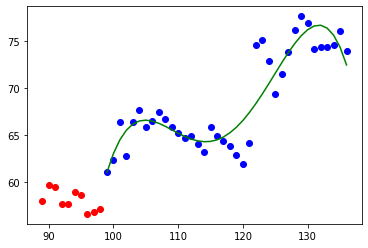

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

y_pred = pol_reg.predict(poly_reg.fit_transform(x_train))
print(f"y_pred (shape = {y_pred.shape})")

plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, y_pred, color="green")
plt.show()

### Make a loop over different degrees and visualize results.

Degree: 1


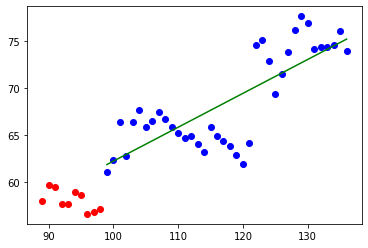

Degree: 2


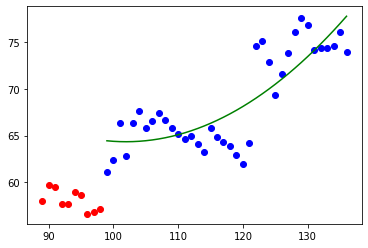

Degree: 3


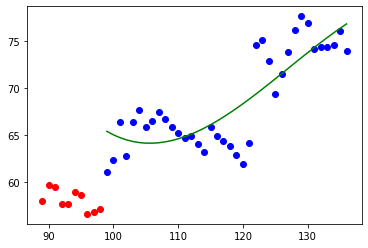

Degree: 4


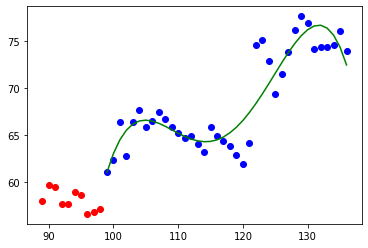

Degree: 5


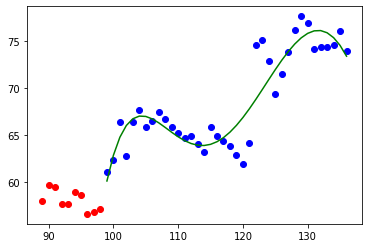

Degree: 6


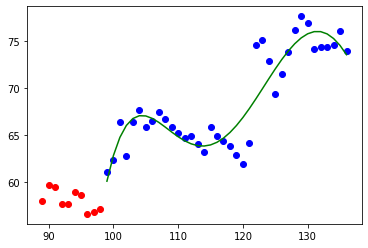

Degree: 7


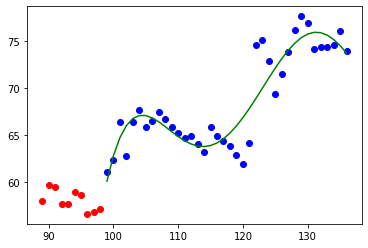

Degree: 8


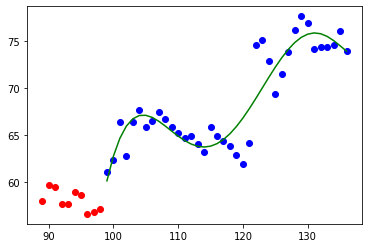

Degree: 9


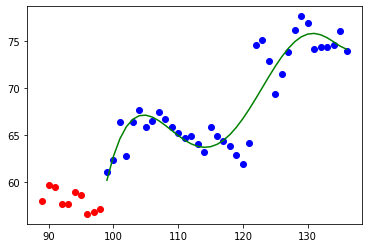

Degree: 10


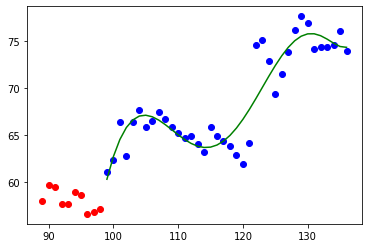

In [9]:
for k in range(1, 11):
    poly_reg = PolynomialFeatures(degree=k)
    X_poly = poly_reg.fit_transform(x_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)

    y_pred = pol_reg.predict(poly_reg.fit_transform(x_train))

    print("Degree:", k)
    
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='red')
    plt.plot(x_train, y_pred, color="green")
    plt.show()

### Now, apply your experience to new dataset, share your results. 
1 Think about some of your dreams.
2 Take one that is the most expensive (car, house,. etc)
3 calculate its price in dollars
4 write down your expected salary in dollars/year and your age at this moment: (25,100000)
5 implement regression models to figure out whether you will buy it or not)

In [19]:
dataset = pandas.read_csv('your_dream.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

print(x[:5])
print(y[:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


Train test split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

print(f"x_train (shape = {x_train.shape})")
print(f"x_test: (shape = {x_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

x_train (shape = (320, 2))
x_test: (shape = (80, 2))
y_train: (shape = (320,))
y_test: (shape = (80,))
y_train: (shape = (320, 1))
y_test: (shape = (80, 1))


Scaling. Use StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(data)
scaled_data = sc.transform(data)

plt.scatter(scaled_data[:,0], scaled_data[:,1])
plt.show()

Fit regression

In [22]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()
classifier.fit(x_train, y_train)

LinearRegression()

Make a prediction. Don't forget to scale your input.
Try small and big values. Share the result.

In [26]:
# my_plan = np.array([25,100000]).reshape(1,-1)
my_plan = np.array([[25, 100000]])
my_plan = sc.transform(my_plan)
y_pred = classifier.predict(my_plan)
print(y_pred)

[[-0.99736129]]
